## Fraud detection project overvew


<dl>
  <dt>The project goal is to build a fraud predictive model with accuracy above 90%.</dt>
  <dd>This is a binary classification task  as our target represent binary data. </dd>
  <dd>I will clean data and perform feature engineering. In the next step I will split data to test and train sets to validate my results.</dd>
    <dd>I'm going to use Scikit-learn classification models and hyperparameters toning process.</dd>
    <dd>Models: Logistic regression, Decision Tree Classifier, Gradient Boosting Classifier, Random Forest Classifier.</dd>
    <dd>In parallel I will perform search of the best hyperparameters using Scikit-learn Grid Search and Randomized Search CV.</dd>
    <dd>In my last step, I will use Scikit-learn Voting Classifier that will be trained on top 3 best performing models.</dd>
    <dd>Voting Classifier model will be saved</dd>
</dl>

Source of record data is kaggle website. Record include 20468 entries in 113 columns. Link to [data](https://www.kaggle.com/volodymyrgavrysh/fraud-detection-bank-dataset-20k-records-binary).

![alt text](fraud.jpg)

In [1]:
#Import necessery libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import data scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Import Hyperparameter Tuning tools
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# from sklearn.metrics import precision_recall_curve


In [2]:
# Read data
df = pd.read_csv(r"C:\Users\Piotr\Documents\DS projects\resume_projects\Fraud_detection_classification\fraud_detection_bank_dataset.csv")
df.head(3)

,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
0,0,9,1354,0,18,0,1,7,9,0,...,0,0,0,1,1,0,0,0,49,1
1,1,0,239,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,55,1
2,2,0,260,0,4,0,3,6,0,0,...,0,0,0,1,1,0,0,0,56,1


### Data Cleaning

<ol>
<li>Drop column Unnamed</li>
<li>Check for empty strings</li>
<li>Check for data type and make sure all numeric</li>
</ol>

In [3]:
# Drop column 'Unnamed: 0 - index duplication
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
# Look at the shape of the data
print('Data Frame shape:', df.shape)

Data Frame shape: (20468, 113)


In [5]:
# Find values with empty strings
missing = df.isnull().any().sum()
print('Count of features with missing values:', missing)

Count of features with missing values: 0


In [6]:
# Define function to print features types
def ColumnType(data):
    template="%-8s %-10s %5s"
    print(template % ("Column Name", "Type","Example Value"))
    print("-"*36)
    for c in data.columns:
        print(template % (c, data[c].dtype, data[c].iloc[1]) )

In [7]:
# Print column types
ColumnType(df)

Column Name Type       Example Value
------------------------------------
col_0    int64          0
col_1    int64        239
col_2    int64          0
col_3    int64          1
col_4    int64          0
col_5    int64          1
col_6    int64          0
col_7    int64          0
col_8    int64          0
col_9    int64          0
col_10   int64          0
col_11   int64          0
col_12   int64          0
col_13   int64          0
col_14   int64          0
col_15   int64          0
col_16   int64          1
col_17   int64          0
col_18   int64          0
col_19   int64          0
col_20   int64          0
col_21   int64          0
col_22   int64          0
col_23   int64          7
col_24   int64          1
col_25   int64          0
col_26   int64          0
col_27   int64          0
col_28   int64          1
col_29   int64          1
col_30   int64          0
col_31   int64          0
col_32   int64          0
col_33   int64          0
col_34   int64          0
col_35   int64  

## Feature Engineering

<li>Run correlation matrix</li>
<li>Remove features with low correlation to reduce dimensionality</li>
<li>Run mutual info classifier to further reduce the dimensionality of data</li>

In [8]:
# Calculate the correlation matrix and take the absolute value
corr_matrix =df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)
tri_df


,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
col_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
col_1,0.551274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
col_2,0.005679,0.301637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
col_3,0.077408,0.280233,0.018034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
col_4,0.002019,0.102733,0.068560,0.012554,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
col_108,0.000603,0.001469,0.005294,0.001617,0.000695,0.001556,0.000894,0.000603,NaN,NaN,...,0.000469,0.005221,0.000346,0.010468,0.014398,NaN,NaN,NaN,NaN,NaN
col_109,0.011074,0.088685,0.029326,0.070381,0.051145,0.124398,0.003134,0.011074,NaN,NaN,...,0.082940,0.107412,0.061839,0.057408,0.114461,0.030680,NaN,NaN,NaN,NaN
col_110,0.015806,0.111713,0.009831,0.049871,0.006374,0.116577,0.008749,0.015806,NaN,NaN,...,0.040426,0.003011,0.200445,0.061286,0.150089,0.000556,0.139361,NaN,NaN,NaN
col_111,0.052114,0.206308,0.033094,0.127431,0.056226,0.223831,0.021537,0.052114,NaN,NaN,...,0.136194,0.402607,0.124260,0.221531,0.329699,0.013871,0.369065,0.334947,NaN,NaN


In [9]:
# List column names of highly correlated features (r > 0.8 )
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.8)]
to_drop



['col_0',
 'col_1',
 'col_7',
 'col_22',
 'col_23',
 'col_36',
 'col_37',
 'col_38',
 'col_40',
 'col_42',
 'col_44',
 'col_47',
 'col_48',
 'col_49',
 'col_50',
 'col_54',
 'col_55',
 'col_57',
 'col_60',
 'col_63',
 'col_64',
 'col_65']

In [10]:
# Count sum of procentage features from correlation matrix
nan_coll = tri_df[tri_df.columns[tri_df.isnull().any()]].isnull().sum() * 100 / tri_df.shape[0]

# Create Data frame for features with 100% of null values to remove them from dataset
df_proc = pd.DataFrame(nan_coll, columns = ['Procentage'])
col_to_remove = df_proc[df_proc['Procentage'] == 100].index.tolist()
col_to_remove.remove('targets')
col_to_remove

['col_8',
 'col_9',
 'col_10',
 'col_11',
 'col_12',
 'col_18',
 'col_19',
 'col_20',
 'col_21',
 'col_35',
 'col_51',
 'col_52',
 'col_53',
 'col_70',
 'col_71']

In [11]:
# Prepare list of features to drop
final_drop_list = to_drop + col_to_remove
final_drop_list.sort()
final_drop_list

['col_0',
 'col_1',
 'col_10',
 'col_11',
 'col_12',
 'col_18',
 'col_19',
 'col_20',
 'col_21',
 'col_22',
 'col_23',
 'col_35',
 'col_36',
 'col_37',
 'col_38',
 'col_40',
 'col_42',
 'col_44',
 'col_47',
 'col_48',
 'col_49',
 'col_50',
 'col_51',
 'col_52',
 'col_53',
 'col_54',
 'col_55',
 'col_57',
 'col_60',
 'col_63',
 'col_64',
 'col_65',
 'col_7',
 'col_70',
 'col_71',
 'col_8',
 'col_9']

In [12]:
# Drop the choosen features from DataFrame
df.drop(columns = final_drop_list, axis=1, inplace=True)
df.shape


(20468, 76)

In [13]:
# Splitting target variable from independent variables
X = df.drop(["targets"], axis = 1)
y = df["targets"]

print('X shape:', X.shape)
print('y shape:', y.shape)


X shape: (20468, 75)
y shape: (20468,)


In [14]:
# Import method from sklearn
from sklearn.feature_selection import mutual_info_classif

In [15]:
# Apply classifier to variables(X, y)
mutual_info_classif(X, y)

array([0.01354099, 0.08923437, 0.00078957, 0.14602954, 0.07943286,
       0.0012757 , 0.03365246, 0.00079862, 0.00042276, 0.0020704 ,
       0.0110804 , 0.0282232 , 0.04712309, 0.00160602, 0.00173407,
       0.01466956, 0.01983397, 0.01156918, 0.        , 0.0012862 ,
       0.00828982, 0.00217543, 0.0138361 , 0.00930114, 0.00042682,
       0.00044761, 0.00162807, 0.        , 0.00616502, 0.01387951,
       0.0067679 , 0.02123711, 0.06853498, 0.06893973, 0.02336412,
       0.00506016, 0.0063985 , 0.03924281, 0.00250928, 0.04598514,
       0.01490033, 0.        , 0.        , 0.00138978, 0.00290799,
       0.00646632, 0.12273956, 0.02272229, 0.03093111, 0.03452353,
       0.02061707, 0.00729172, 0.02515761, 0.00673906, 0.0004814 ,
       0.        , 0.0040511 , 0.01087666, 0.00463195, 0.00463068,
       0.00643368, 0.01924308, 0.        , 0.00340784, 0.00442183,
       0.02409204, 0.00549705, 0.03550067, 0.00522218, 0.03674852,
       0.01977932, 0.        , 0.01315436, 0.0023435 , 0.16827

In [16]:
# Create data frame from mutual info classifier
variable_imp = pd.DataFrame(mutual_info_classif(X, y), index=X.columns)

# Assign coumn name and sort valyes in descending order. 
variable_imp.columns = ['importance']
df_imp = variable_imp.sort_values(by='importance', ascending=False)
df_imp.head(10).T

,col_111,col_5,col_83,col_3,col_6,col_68,col_67,col_106,col_14,col_104
importance,0.171528,0.147819,0.121485,0.091977,0.078834,0.071715,0.067184,0.044903,0.044901,0.043268


Text(0, 0.5, 'Variable Importance Score')

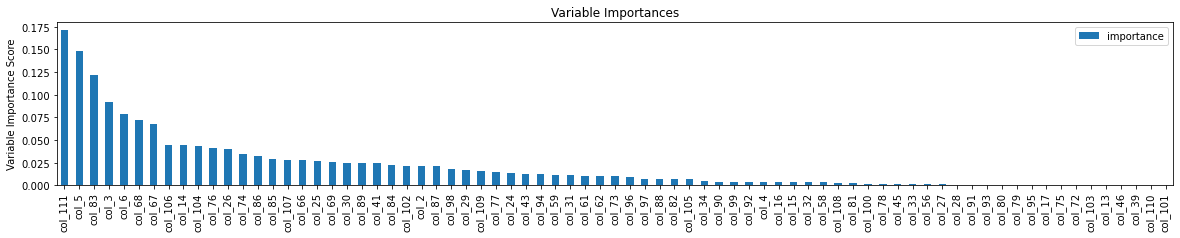

In [17]:
# Create bar chart for varable importance 
plt.rcParams["figure.figsize"] = (20, 3)
df_imp.plot(kind='bar', title='Variable Importances')
plt.ylabel('Variable Importance Score')

In [18]:
# Drop columns where mutual info classifier is equal to 0
outlist = variable_imp[variable_imp['importance'] == 0]
outlist_col = (outlist.index).tolist()

X.drop(columns = outlist_col, axis=1, inplace=True)
X.shape

(20468, 66)

## Scalling

In [19]:
# Count Target values
print(f'Test set values count:\n{pd.value_counts(pd.Series(y))} %\n')
                   
# Count procentage split for Target values
print(f'Procentage Target values:\n{round(pd.value_counts(pd.Series(y), normalize=True), 2)*100}')

Test set values count:
0    15030
1     5438
Name: targets, dtype: int64 %

Procentage Target values:
0    73.0
1    27.0
Name: targets, dtype: float64


Target data represent 27% to 73% they are inbalance 
Some classification problems can exhibit a large imbalance in the distribution of the target classes: for instance there could be several times more negative samples than positive samples. In such cases it is recommended to use stratified sampling to ensure that relative class frequencies is approximately preserved in each train and validation fold.

In [20]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Modeling

In [21]:
# Split data for Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123, stratify=y)

In [22]:
# Print procentage train and test target values 
print("Procentage train set values:")
print(round(pd.value_counts(pd.Series(y_train), normalize=True), 2)*100, '\n')
print("Procentage test set values:")
print(round(pd.value_counts(pd.Series(y_test), normalize=True), 2)*100)

Procentage train set values:
0    73.0
1    27.0
Name: targets, dtype: float64 

Procentage test set values:
0    73.0
1    27.0
Name: targets, dtype: float64


## Parameters & Visualization

<p>List of used parameters for clasification problem:<br>
    <ol>
    <li>Accuracy score</li>
    <li>Confusion matrix</li>
    <li>Classification report</li>
    <li>Precision-recall curve</li>
    </ol>
</p>

In [23]:
# Import metrice for classification models
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

In [24]:
# Define function that will provide extensive results information

def results(name, y_pred):
    print('Model is: {}'.format(name))
    #model= ml_model.fit(X_train, y_train)
    #y_pred = model.predict(X_test)
    
    print(f'\nAccuracy Score :\n{accuracy_score(y_test, y_pred) * 100 } %\n')
    print(f'Confusion Matrix :\n{confusion_matrix(y_test, y_pred)}\n')
    
    conf = confusion_matrix(y_test, y_pred, normalize='all')
    print('Confusion Matrix with Normalized Value :')
    print('[[{:.3f}  {:.3f}]\n [{:.3f}  {:.3f}]]\n'.format(conf[0,0], conf[0,1], conf[1,0], conf[1,1]))
    
    print(f'Classification Report :\n{classification_report(y_test, y_pred)}\n')
    print(f'ROC AUC Score :\n{roc_auc_score(y_test, y_pred,)}\n')
    
    #Plot precision-recall curve
    plt.rcParams["figure.figsize"] = (5, 5)
    prec, recall, _ = precision_recall_curve(y_test, y_pred, pos_label=y_pred[1])
    pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

## Models & Hyperparameters tuning

<p>Chossen Scikit-learn classification models will be run and tuned in parallel.<br> Best hyperparameters will refit models.<br>Model results will be shown together with precision-recall curve and used best hyperparameters. 
    List of Scikit-learn models:<br>
    <ol>
    <li>Logistic regression</li>
    <li>Decision Tree Classifier</li>
    <li>Gradient Boosting Classifier</li>
    <li>Random Forest Classifier</li>
    <li>Support Vector Classification</li>
    </ol>
</p>

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   50.4s finished


Model is: Logistic regression

Accuracy Score :
87.42061553492917 %

Confusion Matrix :
[[2897  109]
 [ 406  682]]

Confusion Matrix with Normalized Value :
[[0.708  0.027]
 [0.099  0.167]]

Classification Report :
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      3006
           1       0.86      0.63      0.73      1088

    accuracy                           0.87      4094
   macro avg       0.87      0.80      0.82      4094
weighted avg       0.87      0.87      0.87      4094


ROC AUC Score :
0.7952887117921021

Logistic regression best params: {'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 100, 'C': 10}


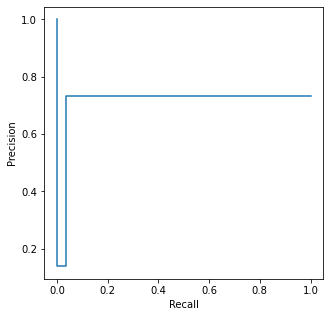

In [25]:
# Logistic regression
# List of parameters for toning

lrparam_grid = {'C': [1, 10, 100, 1000, 1200],
                'penalty': ['l2'],
                'max_iter': list(range(100, 500, 100)),
                'solver': ['newton-cg', 'lbfgs', 'sag']
               }

lr_search = RandomizedSearchCV(LogisticRegression(random_state=123), 
                               param_distributions=lrparam_grid, refit = True, verbose = 3, cv=5, n_jobs=-1)

# Fit train data and predict test data 
lr_search.fit(X_train , y_train)
lr_pred = lr_search.predict(X_test)


# Show results
results('Logistic regression', lr_pred)

# Print best model parameters
print('Logistic regression best params:', lr_search.best_params_)

Model is: DecisionTreeClassifier

Accuracy Score :
90.59599413776257 %

Confusion Matrix :
[[2799  207]
 [ 178  910]]

Confusion Matrix with Normalized Value :
[[0.684  0.051]
 [0.043  0.222]]

Classification Report :
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      3006
           1       0.81      0.84      0.83      1088

    accuracy                           0.91      4094
   macro avg       0.88      0.88      0.88      4094
weighted avg       0.91      0.91      0.91      4094


ROC AUC Score :
0.8837673916872137

DTC best params: DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=123)


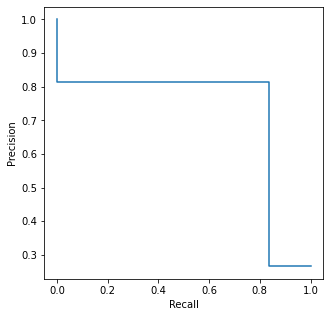

In [26]:
# Decision Tree Classifier

# List of parameters for toning
dtc_params = {'max_depth': [2, 4, 8, 15],
              'max_depth': [4, 10, 20],
              'criterion': ['entropy']
             }

dtc_grid = GridSearchCV(DecisionTreeClassifier(random_state=123), 
                        dtc_params, scoring='roc_auc', cv=5, refit=True, n_jobs=-1)

# Fit train data and predict test data
dtc_grid.fit(X_train , y_train)
dtc_pred = dtc_grid.predict(X_test)

# Show results
results('DecisionTreeClassifier', dtc_pred)

# Print best model parameters
print('DTC best params:', dtc_grid.best_estimator_)


Model is: Gradient Boosting Classifier

Accuracy Score :
92.67220322423057 %

Confusion Matrix :
[[2857  149]
 [ 151  937]]

Confusion Matrix with Normalized Value :
[[0.698  0.036]
 [0.037  0.229]]

Classification Report :
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3006
           1       0.86      0.86      0.86      1088

    accuracy                           0.93      4094
   macro avg       0.91      0.91      0.91      4094
weighted avg       0.93      0.93      0.93      4094


ROC AUC Score :
0.905822851845329

GBC best params: GradientBoostingClassifier(max_depth=5, random_state=123)


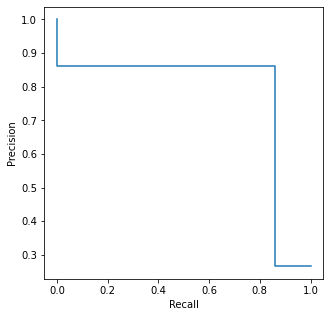

In [27]:
# Gradient Boosting Classifier
# List of parameters for toning
gbc_params = {'learning_rate':[0.001,0.01,0.1,0.05],
            'n_estimators':[100,500,100],
            'max_depth':[3,5,10],
            'min_samples_split':[2,5,10]}

gbc_grid = RandomizedSearchCV(GradientBoostingClassifier(random_state=123), 
                              gbc_params, scoring='roc_auc', cv=3, refit=True, n_jobs=-1)

# Fit train data and predict test data 
gbc_grid.fit(X_train , y_train)
gbc_predict = gbc_grid.predict(X_test)

# Show results
results('Gradient Boosting Classifier', gbc_predict)

# Print best model parameters
print('GBC best params:', gbc_grid.best_estimator_)


Model is: Random Forest Classifier

Accuracy Score :
92.67220322423057 %

Confusion Matrix :
[[2869  137]
 [ 163  925]]

Confusion Matrix with Normalized Value :
[[0.701  0.033]
 [0.040  0.226]]

Classification Report :
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3006
           1       0.87      0.85      0.86      1088

    accuracy                           0.93      4094
   macro avg       0.91      0.90      0.91      4094
weighted avg       0.93      0.93      0.93      4094


ROC AUC Score :
0.9023041539470079

RFC best parameters: RandomForestClassifier(bootstrap=False, max_features=10, min_samples_leaf=3,
                       n_estimators=300, random_state=123)


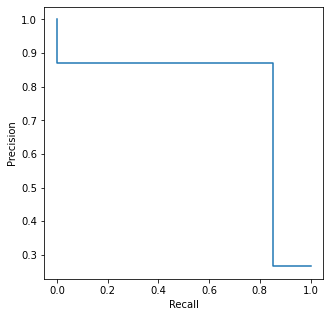

In [28]:
# Random Forest Classifier
# List of parameters for toning
rfc_params = {'max_features':[1,3,10],
              'min_samples_split':[2,3,10],
              'min_samples_leaf':[1,3,10],
              'bootstrap':[False],
              'n_estimators':[100,300],
              'criterion':['gini']}

rfc_grid = GridSearchCV(RandomForestClassifier(random_state=123), 
                        rfc_params, scoring='roc_auc', cv=3, refit=True, n_jobs=-1)

# Fit train data and predict test data 
rfc_grid.fit(X_train , y_train)
rfc_pred = rfc_grid.predict(X_test)

# Show results
results('Random Forest Classifier', rfc_pred)

# Print best model parameters
print('RFC best parameters:', rfc_grid.best_estimator_)


Model is: Support Vector Classifier

Accuracy Score :
89.49682462139717 %

Confusion Matrix :
[[2852  154]
 [ 276  812]]

Confusion Matrix with Normalized Value :
[[0.697  0.038]
 [0.067  0.198]]

Classification Report :
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      3006
           1       0.84      0.75      0.79      1088

    accuracy                           0.89      4094
   macro avg       0.88      0.85      0.86      4094
weighted avg       0.89      0.89      0.89      4094


ROC AUC Score :
0.8475463289108058

SVC best parameters: {'C': 2, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}


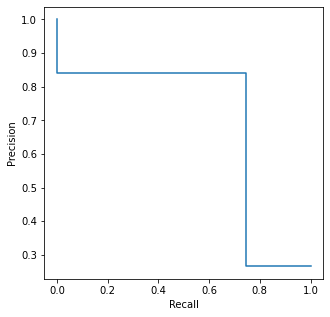

In [29]:
# List of parameters for toning
svc_params = {'kernel': ['rbf'],
              'C': [2, 3, 5],
              'gamma': [0.1],
              'degree':[2]}

svc_grid = GridSearchCV(SVC(random_state=123), 
                        svc_params, scoring='roc_auc', cv=3, refit=True, n_jobs=-1)

# Fit train data and predict test data
svc_grid.fit(X_train, y_train)
svc_pred = svc_grid.predict(X_test)

# Model Results
results('Support Vector Classifier', svc_pred)

# Print best model parameters
print('SVC best parameters:', svc_grid.best_params_)

## Final Results

I will run Voting Classifier to combine classifiers and use the average predicted probabilities.
<p>Chossen Scikit-learn classification models with the best results are:<br> 
    <ol>
    <li>Decision Tree Classifier</li>
    <li>Gradient Boosting Classifier</li>
    <li>Random Forest Classifier</li>
    </ol>

</p>


Model is: Voting Classifier 3 models: 

Accuracy Score :
92.67220322423057 %

Confusion Matrix :
[[2862  144]
 [ 156  932]]

Confusion Matrix with Normalized Value :
[[0.699  0.035]
 [0.038  0.228]]

Classification Report :
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3006
           1       0.87      0.86      0.86      1088

    accuracy                           0.93      4094
   macro avg       0.91      0.90      0.91      4094
weighted avg       0.93      0.93      0.93      4094


ROC AUC Score :
0.9043567277210285



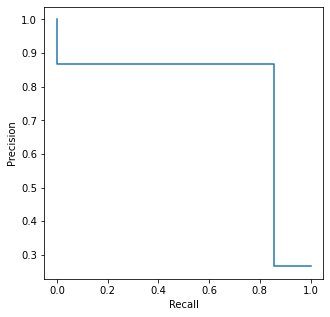

In [30]:
# List of models for voting classifier 
vc = VotingClassifier([('RFC', rfc_grid.best_estimator_),
                      ('DTC', dtc_grid.best_estimator_),
                      ('GBC', gbc_grid.best_estimator_)],
                      voting='soft' ,n_jobs=-1,)

vc.fit(X_train, y_train)
vc_pred = vc.predict(X_test)

results('Voting Classifier 3 models: ', vc_pred)

Voting calssifier results for 3 choosen models delivered the Accuracy Score: 92.5%

## Save Model

In [31]:
import joblib
joblib.dump(vc_pred, 'VC_Model')

['VC_Model']